# Cell Analysis Worksheet #1

### Emaad Khwaja

<div class="alert alert-warning">
    <b>NOTE</b> This worksheet is meant to be challenging. It very much represents a normal process towards analyzing cell images. Except to do a ton of Googling.
</div>

## Introduction

Below is an example of a cell barcode. Similar to how we have RGB channels on a digital image, we acquire images of fluorophores on different channels based on the colors they emit. In an RGB image, a unique color is produced based on the ratio of the intensities within each color channel, we selectively insert unique flurophore ratios into cells to identify them.

![Cell Barcode](Images/Barcode.jpg)

We want to select which cells in an image correspond to a unique population. The CSV file has already identified the per-channel intensity for each cell in a particular image. This file contains a mixture of different cell types.

## Pandas Basics

![](Images/panda.png)

<div class="alert alert-warning">
    <b>NOTE</b> This analysis will rely on some external packages. You will need to import <i>numpy</i>, <i>pandas</i>, <i>sklearn</i>, and <i>matplotlib</i>.
</div>

0. Import the CSV file and convert it to a pandas dataframe. You will use this for the rest of the analysis so pick a good name for it. (i.e. cell_dataframe)

In [6]:
import pandas as pd
pdcellframe = pd.read_csv("./worksheet_1_cell_channel_intensities.csv")

pdcellframe

,Mask Number,Area (px^2),Center X (px),Center Y (px),DAPI - Clean Intensity (Magnitude/px^2),DAPI - Clean Standard Deviation (Magnitude),DAPI - Clean Background Intensity (Magnitude/px^2),FITC - Clean Intensity (Magnitude/px^2),FITC - Clean Standard Deviation (Magnitude),FITC - Clean Background Intensity (Magnitude/px^2),Alexa 594 Clean (620-60) Intensity (Magnitude/px^2),Alexa 594 Clean (620-60) Standard Deviation (Magnitude),Alexa 594 Clean (620-60) Background Intensity (Magnitude/px^2)
0,1,618,1966.0,64.0,121.964401,45.339834,179.626214,342.998382,126.694882,115.478964,98.608414,39.241414,91.103560
1,2,379,1998.0,72.0,152.277045,56.459470,176.498681,359.274406,107.507911,120.000000,132.282322,53.710344,95.907652
2,3,93,1978.0,82.0,99.139785,19.875477,179.000000,197.505376,24.829691,118.010753,82.440860,15.828196,89.709677
3,4,178,1798.0,83.0,110.466292,29.490044,204.000000,223.460674,44.608544,115.000000,100.769663,24.566243,89.000000
4,5,226,1819.0,86.0,104.017699,24.913533,203.672566,176.044248,28.216903,115.000000,80.243363,19.597462,89.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2306,263,1224.0,2041.0,484.353612,65.225093,218.000000,168.825095,211.105886,122.000000,182.391635,78.151416,76.000000
2306,2307,289,1279.0,2041.0,446.491350,46.772739,215.000000,144.110727,196.339897,121.190311,150.394464,57.118634,77.000000
2307,2308,160,1363.0,2041.0,309.000000,22.979269,213.950000,82.668750,52.099204,112.000000,64.181250,13.587764,87.000000
2308,2309,97,1846.0,2044.0,423.072165,26.934964,174.804124,103.865979,100.361144,121.000000,111.216495,28.652453,86.000000


1. Use the .head() and .tail() commands to visualize parts of the dataframe

In [7]:
pdcellframe.head()


pdcellframe.tail()

,Mask Number,Area (px^2),Center X (px),Center Y (px),DAPI - Clean Intensity (Magnitude/px^2),DAPI - Clean Standard Deviation (Magnitude),DAPI - Clean Background Intensity (Magnitude/px^2),FITC - Clean Intensity (Magnitude/px^2),FITC - Clean Standard Deviation (Magnitude),FITC - Clean Background Intensity (Magnitude/px^2),Alexa 594 Clean (620-60) Intensity (Magnitude/px^2),Alexa 594 Clean (620-60) Standard Deviation (Magnitude),Alexa 594 Clean (620-60) Background Intensity (Magnitude/px^2)
2305,2306,263,1224.0,2041.0,484.353612,65.225093,218.000000,168.825095,211.105886,122.000000,182.391635,78.151416,76.0
2306,2307,289,1279.0,2041.0,446.491350,46.772739,215.000000,144.110727,196.339897,121.190311,150.394464,57.118634,77.0
2307,2308,160,1363.0,2041.0,309.000000,22.979269,213.950000,82.668750,52.099204,112.000000,64.181250,13.587764,87.0
2308,2309,97,1846.0,2044.0,423.072165,26.934964,174.804124,103.865979,100.361144,121.000000,111.216495,28.652453,86.0
2309,2310,29,2023.0,2045.0,426.517241,29.163418,155.172414,112.172414,68.801796,104.206897,144.931035,31.219192,89.0


## Cell Stats

![](Images/histogram.png)

1. Using the Area (px^2) column, calculate the average cell area. What is the standard deviation?

In [8]:
pdcellframe.keys()

Index(['Mask Number', 'Area (px^2)', 'Center X (px)', 'Center Y (px)',
       'DAPI - Clean Intensity (Magnitude/px^2)',
       'DAPI - Clean Standard Deviation (Magnitude)',
       'DAPI - Clean Background Intensity (Magnitude/px^2)',
       'FITC - Clean Intensity (Magnitude/px^2)',
       'FITC - Clean Standard Deviation (Magnitude)',
       'FITC - Clean Background Intensity (Magnitude/px^2)',
       'Alexa 594 Clean (620-60) Intensity (Magnitude/px^2)',
       'Alexa 594 Clean (620-60) Standard Deviation (Magnitude)',
       'Alexa 594 Clean (620-60) Background Intensity (Magnitude/px^2)'],
      dtype='object')

In [9]:
import numpy as np

pdcellframe
np.mean(pdcellframe.loc[:, 'Area (px^2)'])



341.23203463203464

In [10]:
pdcellframe["Area (px^2)"].std()

168.17284158504788

2. Create a frequency histogram of the cell areas.

0       618
1       379
2        93
3       178
4       226
       ... 
2305    263
2306    289
2307    160
2308     97
2309     29
Name: Area (px^2), Length: 2310, dtype: int64


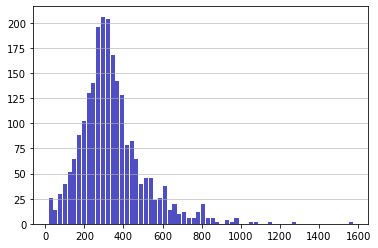

In [11]:
import matplotlib.pyplot as plt
print(pdcellframe["Area (px^2)"])
n, bins, patches = plt.hist(x=pdcellframe["Area (px^2)"], bins= "auto", color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)

3. How big is the largest cell? What is the mask number corresponding to this cell?

In [12]:
#This was our attempt

column = pdcellframe["Area (px^2)"]
maxvalue = column.max()
pdcellframe.index[maxvalue]

dababy = pdcellframe[pdcellframe["Area (px^2)"]== maxvalue].index
s = pdcellframe["Mask Number"]
for i in dababy:
    print("[", s[i], ",", pdcellframe.index[maxvalue], "]")

    
        

[ 590 , 1575 ]
[ 1745 , 1575 ]


In [13]:
#Answer

pdcellframe[pdcellframe["Area (px^2)"] == maxvalue]

,Mask Number,Area (px^2),Center X (px),Center Y (px),DAPI - Clean Intensity (Magnitude/px^2),DAPI - Clean Standard Deviation (Magnitude),DAPI - Clean Background Intensity (Magnitude/px^2),FITC - Clean Intensity (Magnitude/px^2),FITC - Clean Standard Deviation (Magnitude),FITC - Clean Background Intensity (Magnitude/px^2),Alexa 594 Clean (620-60) Intensity (Magnitude/px^2),Alexa 594 Clean (620-60) Standard Deviation (Magnitude),Alexa 594 Clean (620-60) Background Intensity (Magnitude/px^2)
589,590,1575,1183.0,1156.5,278.019682,70.733111,271.215873,546.399365,114.838481,131.025397,167.601905,47.452065,98.862222
1744,1745,1575,1183.0,1156.5,546.399365,70.733111,271.215873,278.019682,114.838481,131.025397,167.601905,47.452065,98.862222


In [14]:
pdcellframe["Area (px^2)"]

0       618
1       379
2        93
3       178
4       226
       ... 
2305    263
2306    289
2307    160
2308     97
2309     29
Name: Area (px^2), Length: 2310, dtype: int64

## Population Identification

1. We need to calculate the relative ratios of each color channel. Create a new column (pandas) which is a sum of every column labeled (Clean Intensity (Magnitude/px^2)).

In [15]:
pdcellframe.keys()

Index(['Mask Number', 'Area (px^2)', 'Center X (px)', 'Center Y (px)',
       'DAPI - Clean Intensity (Magnitude/px^2)',
       'DAPI - Clean Standard Deviation (Magnitude)',
       'DAPI - Clean Background Intensity (Magnitude/px^2)',
       'FITC - Clean Intensity (Magnitude/px^2)',
       'FITC - Clean Standard Deviation (Magnitude)',
       'FITC - Clean Background Intensity (Magnitude/px^2)',
       'Alexa 594 Clean (620-60) Intensity (Magnitude/px^2)',
       'Alexa 594 Clean (620-60) Standard Deviation (Magnitude)',
       'Alexa 594 Clean (620-60) Background Intensity (Magnitude/px^2)'],
      dtype='object')

In [16]:
pdcellframelist=['DAPI - Clean Intensity (Magnitude/px^2)', 'FITC - Clean Intensity (Magnitude/px^2)', 'Alexa 594 Clean (620-60) Intensity (Magnitude/px^2)']
pdcellframe['results'] = pdcellframe[pdcellframelist].sum(axis=1)

pdcellframe['results']

0       563.571197
1       643.833773
2       379.086021
3       434.696629
4       360.305310
           ...    
2305    835.570342
2306    740.996540
2307    455.850000
2308    638.154639
2309    683.620690
Name: results, Length: 2310, dtype: float64

2. Plot a frequency histogram of the summation column.

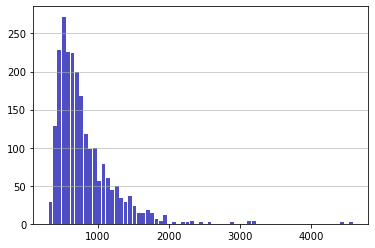

In [17]:
n, bins, patches = plt.hist(x=pdcellframe["results"], bins= "auto", color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)

3. Now create 3 more columns which correspond to the relative ratio of each channel to the newly created sum column. 

In [18]:
pdcellframe['DAPIratio'] = pdcellframe['DAPI - Clean Intensity (Magnitude/px^2)']/pdcellframe["results"]
pdcellframe['FITCratio'] = pdcellframe['FITC - Clean Intensity (Magnitude/px^2)']/pdcellframe["results"]
pdcellframe['ALEXAratio'] = pdcellframe['Alexa 594 Clean (620-60) Intensity (Magnitude/px^2)']/pdcellframe["results"]

pdcellframe['DAPIratio']

0       0.216413
1       0.236516
2       0.261523
3       0.254123
4       0.288693
          ...   
2305    0.579668
2306    0.602555
2307    0.677855
2308    0.662962
2309    0.623909
Name: DAPIratio, Length: 2310, dtype: float64

In [19]:
pdcellframe['FITCratio']

0       0.608616
1       0.558024
2       0.521004
3       0.514061
4       0.488597
          ...   
2305    0.202048
2306    0.194482
2307    0.181351
2308    0.162760
2309    0.164086
Name: FITCratio, Length: 2310, dtype: float64

In [20]:
pdcellframe['ALEXAratio']

0       0.174971
1       0.205460
2       0.217473
3       0.231816
4       0.222709
          ...   
2305    0.218284
2306    0.202962
2307    0.140795
2308    0.174278
2309    0.212005
Name: ALEXAratio, Length: 2310, dtype: float64

4. Using the newly created relative ratio columns, create 3 scatterplots with the following axes:

a) DAPI vs FITC

b) FITC vs Alexa-594

c) DAPI vs Alexa-594

Bonus: Make a 3D scatter plot with all 3 color channels

How many cell populations do we appear to have based on these three plots?

In [21]:
#Dscat = pdcellframe.plot.scatter(x = "Mask Number", y = ["DAPIratio", "FITCratio"], c = "g")
#Fscat = pdcellframe.plot.scatter(x = "Mask Number", y = "FITCratio", c = "b")
#Ascat = pdcellframe.plot.scatter(x = "Mask Number", y = "ALEXAratio", c = "r")

#pdcellframe.plot(kind = 'scatter', x = "Mask Number", y = ["DAPIratio", "FITCratio"])

#from pandas import plotly

#pd.options.plotting.backend = "plotly"

#df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
#fig = df.plot()
#fig.show()




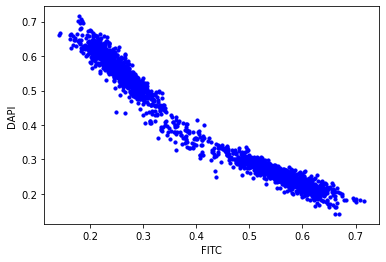

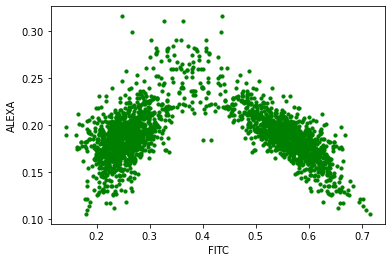

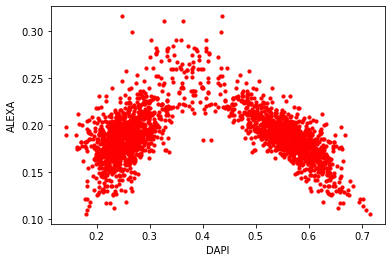

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel("FITC") #x label
plt.ylabel("DAPI") #y label

fig = plt.figure()
ax2 = fig.add_subplot(111)
plt.xlabel("FITC") #x label
plt.ylabel("ALEXA") #y label



fig = plt.figure()
ax3 = fig.add_subplot(111)
plt.xlabel("DAPI") #x label
plt.ylabel("ALEXA") #y label



ax1.scatter(x = pdcellframe["FITCratio"], y = pdcellframe["DAPIratio"], s=10, c='b')
ax2.scatter(x = pdcellframe["FITCratio"], y = pdcellframe["ALEXAratio"], s=10, c='g')
ax3.scatter(x = pdcellframe["DAPIratio"], y = pdcellframe["ALEXAratio"], s=10, c='r')

plt.show()

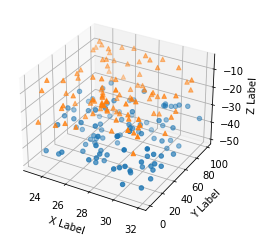

In [23]:

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


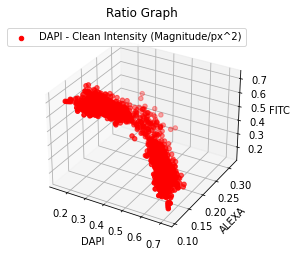

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pdcellframe['DAPIratio'], pdcellframe['ALEXAratio'], pdcellframe['FITCratio'], c='r')
ax.legend(['DAPI - Clean Intensity (Magnitude/px^2)', 'FITC - Clean Intensity (Magnitude/px^2)', 'Alexa 594 Clean (620-60) Intensity (Magnitude/px^2)'])
ax.set_title('Ratio Graph')
ax.set_xlabel('DAPI')
ax.set_ylabel('ALEXA')
ax.set_zlabel('FITC')
plt.show()

## Principal Component Analysis

PCA is a dimension-reduction technique which can be extremely useful in identifying cell populations. In essence, it maximizes sum of the distances between datapoints to show the largest separation. The individual principal components are calculated by multiplying variables in different combinations. We will be using all columns as data sources to see if this provides better clustering.

https://en.wikipedia.org/wiki/Principal_component_analysis

![](Images/PCA.jpeg)

1. Use the following code to plot a PCA representation of the dataframe.

(2310, 2)
(2310, 17)


Text(0, 0.5, 'Second Principal Component')

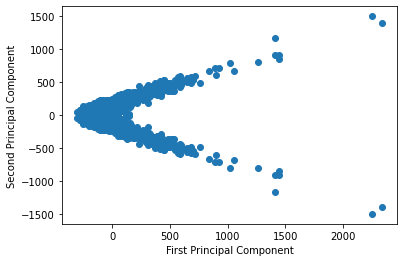

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


ratiolist = pdcellframe[['DAPI - Clean Intensity (Magnitude/px^2)', 'FITC - Clean Intensity (Magnitude/px^2)', 'Alexa 594 Clean (620-60) Intensity (Magnitude/px^2)']]
pca = PCA(n_components = 2)

pca.fit(ratiolist)


x_pca = pca.transform(ratiolist)

print(x_pca.shape)

print(pdcellframe.shape)

plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [26]:
pdcellframe["results"]

0       563.571197
1       643.833773
2       379.086021
3       434.696629
4       360.305310
           ...    
2305    835.570342
2306    740.996540
2307    455.850000
2308    638.154639
2309    683.620690
Name: results, Length: 2310, dtype: float64

In [27]:
print(ratiolist)

      DAPI - Clean Intensity (Magnitude/px^2)  \
0                                  121.964401   
1                                  152.277045   
2                                   99.139785   
3                                  110.466292   
4                                  104.017699   
...                                       ...   
2305                               484.353612   
2306                               446.491350   
2307                               309.000000   
2308                               423.072165   
2309                               426.517241   

      FITC - Clean Intensity (Magnitude/px^2)  \
0                                  342.998382   
1                                  359.274406   
2                                  197.505376   
3                                  223.460674   
4                                  176.044248   
...                                       ...   
2305                               168.825095   
2306               

In [28]:
x_pca.shape

(2310, 2)

2. Sometimes larger intensities can throw off the information hidden within smaller intensity cells. To counter this, we can try applying a logarithmic function to squash down the intensity values. Apply the log function to the intensity columns and recalculate the proportions. Then re-plot the PCA using the same method shown above.

(2310, 2)
(2310, 17)


Text(0, 0.5, 'Second Principal Component')

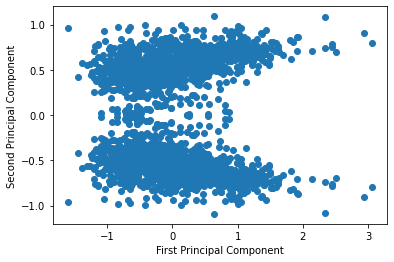

In [29]:
import math as m


ratiolist = pdcellframe[['DAPI - Clean Intensity (Magnitude/px^2)', 'FITC - Clean Intensity (Magnitude/px^2)', 'Alexa 594 Clean (620-60) Intensity (Magnitude/px^2)']]
pca = PCA(n_components = 2)

pca.fit(np.log(ratiolist))


x_pca = pca.transform(np.log(ratiolist))

print(x_pca.shape)

print(pdcellframe.shape)

plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

(2310, 2)
(2310, 17)


Text(0, 0.5, 'Second Principal Component')

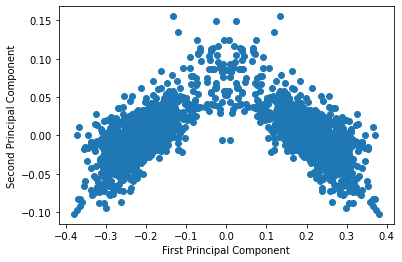

In [30]:
ratiolist = pdcellframe[["DAPIratio", "ALEXAratio", "FITCratio"]]
pca = PCA(n_components = 2)

pca.fit(ratiolist)


x_pca = pca.transform(ratiolist)

print(x_pca.shape)

print(pdcellframe.shape)

plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

(2310, 2)
(2310, 17)


Text(0, 0.5, 'Second Principal Component')

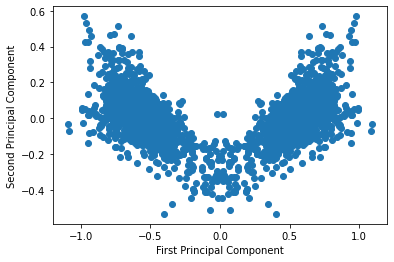

In [31]:
ratiolist = pdcellframe[["DAPIratio", "ALEXAratio", "FITCratio"]]
pca = PCA(n_components = 2)

pca.fit(np.log(ratiolist))


x_pca = pca.transform(np.log(ratiolist))

print(x_pca.shape)

print(pdcellframe.shape)

plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## Clustering

![](Images/kmeans.png)

1. Choose the dataframe that produced the best separation when you plotted. Use k-means clustering to identify which cells apply to which population and add colors to the plots corresponding to the cell identity. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans 

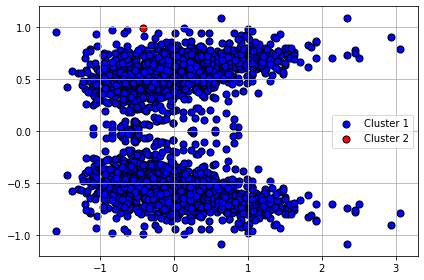

In [32]:
from sklearn.cluster import KMeans
# from sklearn.mixture import GaussianMixture
# from sklearn.cluster import SpectralClustering
# from sklearn.cluster import OPTICS
# from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy import linalg
ratiolist = pdcellframe[['DAPI - Clean Intensity (Magnitude/px^2)', 'FITC - Clean Intensity (Magnitude/px^2)', 'Alexa 594 Clean (620-60) Intensity (Magnitude/px^2)']]
pca = PCA(n_components = 2)

pca.fit(np.log(ratiolist))

x_pca = pca.transform(np.log(ratiolist))
plt.scatter(x_pca[:,0],x_pca[:,1])

# centers = kmeans.cluster_centers_
# kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
# kmeans.fit(x_pca)

# gm = GaussianMixture(n_components=2, random_state=0)
# y_kmc = gm.fit_predict(x_pca)

# sc = SpectralClustering(2, affinity='precomputed', n_init=100, assign_labels='discretize')
# y_kmc = sc.fit_predict(x_pca)

# cl = OPTICS(min_samples=100)
# y_kmc = cl.fit_predict(x_pca)

# clus = DBSCAN(eps=2, min_samples=100)
# y_kmc = clus.fit_predict(x_pca)
xc = x_pca
xcov = np.cov(xc, rowvar=True, bias=True)
w, v = linalg.eig(xcov)
diagw = np.diag(1/(w**0.5))
wpca = np.dot(np.dot(diagw, v.T), xc)
clustering = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmc = clustering.fit_predict(np.real(wpca))




plt.scatter(x_pca[y_kmc == 0, 0], x_pca[y_kmc == 0, 1], s=50,
            c='blue', edgecolor='black', label='Cluster 1')
plt.scatter(x_pca[y_kmc == 1, 0], x_pca[y_kmc == 1, 1],
             s=50, c='red', edgecolor='black', label='Cluster 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


#plot diff colors. 2 cell types. label different population next to it, add new column to the original dataframe (cellgroup)

In [33]:
x_pca[y_kmc == 1,0]

array([-0.42106647])

In [34]:
y_kmc.shape

(2310,)

In [35]:
np.unique(y_kmc, return_counts = True)

(array([0, 1]), array([2309,    1], dtype=int64))

C:\Users\Jogar\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


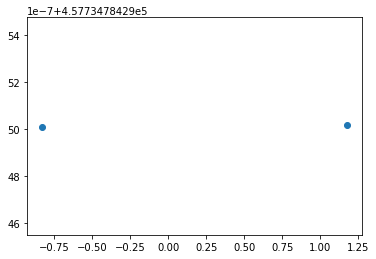

In [36]:
plt.scatter(wpca[0], wpca[1])
plt.show()


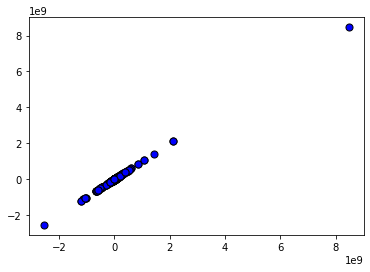

In [37]:
plt.scatter(wpca[(y_kmc == 0).T, 0], wpca[(y_kmc == 0).T, 1], s=50,
            c='blue', edgecolor='black', label='Cluster 1')
# plt.scatter(wpca[(y_kmc == 1).T, 0], wpca[(y_kmc == 1).T, 1],
#              s=50, c='red', edgecolor='black', label='Cluster 2')

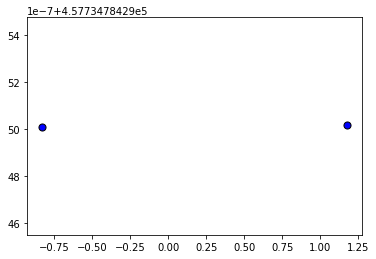

In [38]:
plt.scatter(wpca[0], wpca[1], s=50,
            c='blue', edgecolor='black', label='Cluster 1')

In [39]:
wpca[y_kmc == 0].shape

(2309, 2)

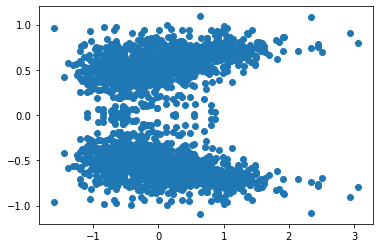

In [40]:
plt.scatter(x_pca[y_kmc == 0, 0], x_pca[y_kmc == 0, 1])

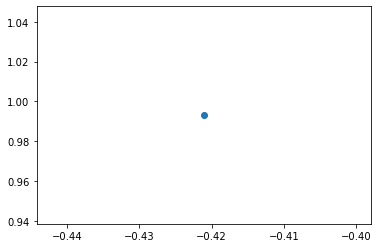

In [41]:
plt.scatter(x_pca[y_kmc == 1, 0], x_pca[y_kmc == 1, 1])

In [43]:
cl1 = x_pca[y_kmc == 0, 0], x_pca[y_kmc == 0, 1]
cl2 = x_pca[y_kmc == 1, 0], x_pca[y_kmc == 1, 1]
x_pca["Cluster Number"] = y_kmc


# for i in range(len(x_pca)):
#     if x_pca["Type"][i] == "Grass":
#         Type_new[i]="Green"
#     else:
#         Type_new[i]= data["Type"][i]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import turtle as t
from random import randint
class Star:
    def __init__(self):
        def setting(self):
            
            t.color('yellow')
            t.begin_fill()
            for i in range(5):
                t.forward(20)
                t.left(144)
            t.end_fill()
        
    def starnumber(number):
        for i in range(number):
            t.speed(0)
            t.penup()
            x=randint(-150,250)
            y=randint(200,300)
            t.goto(x,y)
            t.pendown()
            setting(self)
star=Star()
star.starnumber(10)

In [46]:

pdcellframe[["Cluster Number"]] = y_kmc

pdcellframe

,Mask Number,Area (px^2),Center X (px),Center Y (px),DAPI - Clean Intensity (Magnitude/px^2),DAPI - Clean Standard Deviation (Magnitude),DAPI - Clean Background Intensity (Magnitude/px^2),FITC - Clean Intensity (Magnitude/px^2),FITC - Clean Standard Deviation (Magnitude),FITC - Clean Background Intensity (Magnitude/px^2),Alexa 594 Clean (620-60) Intensity (Magnitude/px^2),Alexa 594 Clean (620-60) Standard Deviation (Magnitude),Alexa 594 Clean (620-60) Background Intensity (Magnitude/px^2),results,DAPIratio,FITCratio,ALEXAratio,Cluster Number
0,1,618,1966.0,64.0,121.964401,45.339834,179.626214,342.998382,126.694882,115.478964,98.608414,39.241414,91.103560,563.571197,0.216413,0.608616,0.174971,0
1,2,379,1998.0,72.0,152.277045,56.459470,176.498681,359.274406,107.507911,120.000000,132.282322,53.710344,95.907652,643.833773,0.236516,0.558024,0.205460,0
2,3,93,1978.0,82.0,99.139785,19.875477,179.000000,197.505376,24.829691,118.010753,82.440860,15.828196,89.709677,379.086021,0.261523,0.521004,0.217473,0
3,4,178,1798.0,83.0,110.466292,29.490044,204.000000,223.460674,44.608544,115.000000,100.769663,24.566243,89.000000,434.696629,0.254123,0.514061,0.231816,0
4,5,226,1819.0,86.0,104.017699,24.913533,203.672566,176.044248,28.216903,115.000000,80.243363,19.597462,89.000000,360.305310,0.288693,0.488597,0.222709,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2306,263,1224.0,2041.0,484.353612,65.225093,218.000000,168.825095,211.105886,122.000000,182.391635,78.151416,76.000000,835.570342,0.579668,0.202048,0.218284,0
2306,2307,289,1279.0,2041.0,446.491350,46.772739,215.000000,144.110727,196.339897,121.190311,150.394464,57.118634,77.000000,740.996540,0.602555,0.194482,0.202962,0
2307,2308,160,1363.0,2041.0,309.000000,22.979269,213.950000,82.668750,52.099204,112.000000,64.181250,13.587764,87.000000,455.850000,0.677855,0.181351,0.140795,0
2308,2309,97,1846.0,2044.0,423.072165,26.934964,174.804124,103.865979,100.361144,121.000000,111.216495,28.652453,86.000000,638.154639,0.662962,0.162760,0.174278,1
